## ZEP Internship Task

### Initial Screening Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Import success')

Import success


### Selection of the Data Set

The data set we will use in this task is the **Student's Performance in Exam** obtained from **Kaggle**. The data set consists of the marks secured by the students in various subjects in anexam session. Lets start by importing the data set.

In [2]:
data = pd.read_csv('../input/students-performance-in-exams/exams.csv')

## 1. Data Visualization

#### Shape of our Dataset

In [3]:
data.shape

(1000, 8)

Our dataset contains 8 variables and 1000 observations.

Lets also visualize the first 5 observation of our data set.

In [4]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68

From the first observation, we can see that our dataset contains 5 categorical variables and 3 quantitatives variables with the variable **gender** that can be considered as the **target** variable for our model if needs be.

We can verify the types of variables so as to confirm what we just observed as follows:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We now have the confirmation that our dataset has indeed 5 categorical variables and 3 quatitatives variables.

#### Statistical Indicators

In [6]:
data.describe()

math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000

In [7]:
data.describe(include=['O'])

gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      517            323                         222       652   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       665

#### Missing values

Lets verify if our dataset contains missing values.

In [8]:
data.isnull().sum().sort_values(ascending=False)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Our dataset does'nt contain any missing values which is great news for us, as such we don't bias to our dataset due to missing values imputations.

### Exploratory Data Analysis

#### Uni variate analysis

#####  Quantitative Variables

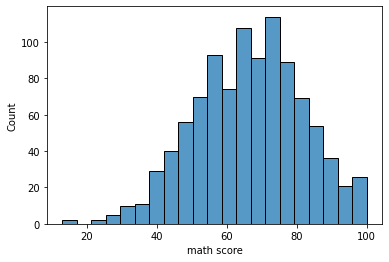

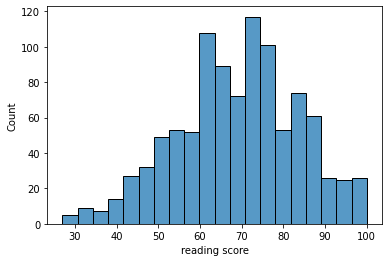

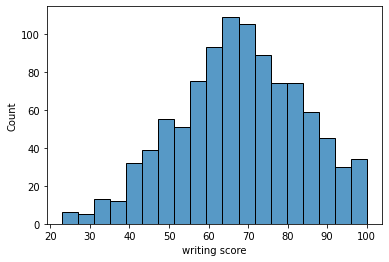

In [9]:
for i in data.select_dtypes(exclude=object):
    plt.figure()
    sns.histplot(data=data, x=i)

It comes out that:

- The notes in **math score** is concentrated between 50 and 80, with a very little part of the students scoring lower than 40 in the math test.
- The notes in **reading score** is concentrated between 60 and 80, with the minority scoring lower than 40 or greater than 90.
- The notes in **writing score** is concentrated between 60 and 75, less than 50 students scoring less than 40.

##### Categorical variables

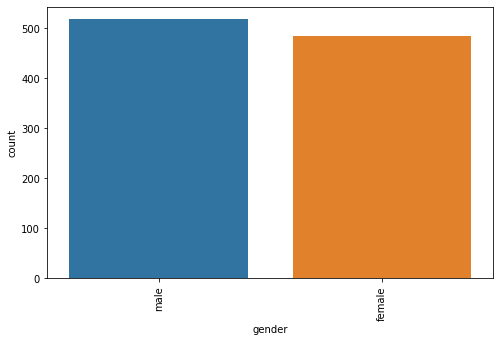

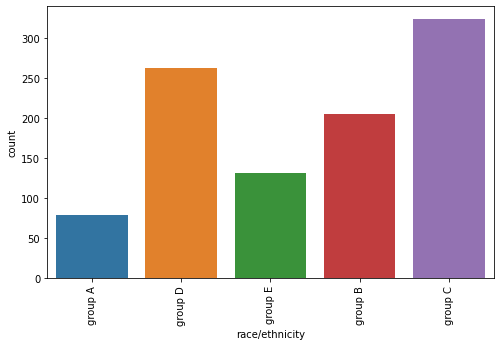

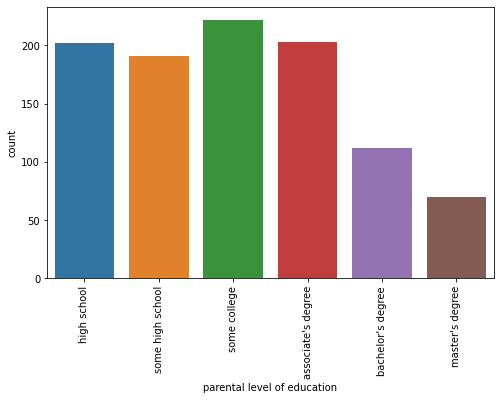

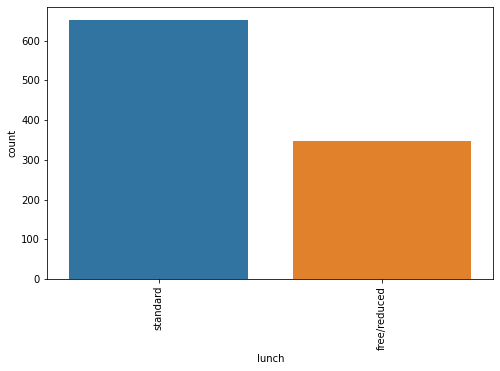

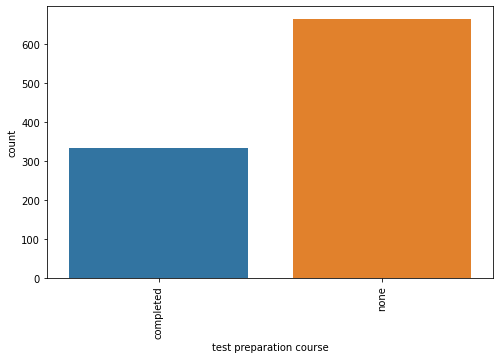

In [10]:
for i in data.select_dtypes(include=object):
    plt.figure(figsize=(8,5))
    plt.tick_params(axis='x', rotation=90)
    sns.countplot(data=data, x = i)

For the uni variate of the categorical varibales, we have:

- The number of male students is slightly greater than the female students
- The group C and Groupe D is greatly represented in the race/ethnicity compared to the others.
- Parents level of education is highly represented by **some college level** , **associate's degree** and **high school level**. A limited number of parents have **master's degree**.
- The majority of the students did'nt complete the test preparation course.

### Bi variate Analysis

#### Two quantitative variables

In other to visualize the quantitative variables in pairs, we can visualize the scatter plot of the two variables.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

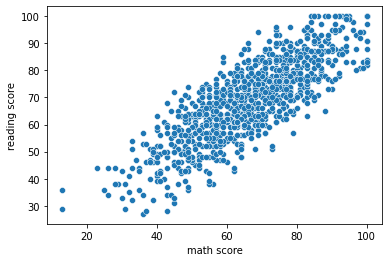

In [11]:
plt.figure()
sns.scatterplot(data=data, x = 'math score', y = 'reading score')

<AxesSubplot:xlabel='math score', ylabel='writing score'>

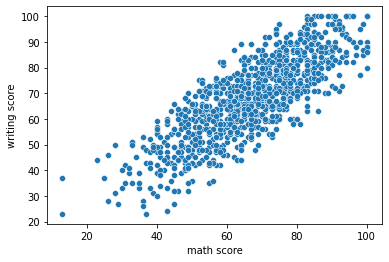

In [12]:
plt.figure()
sns.scatterplot(data=data, x = 'math score', y = 'writing score')

From the scatterplots, we can have the hypothesis that an increase in the **reading score** leads to an increase in the **math score**. Also an increase in the **writing score** also leads to an increase in the **math score**.

We can verify the hypthesis made here through the correlation matrix as follows:


<AxesSubplot:>

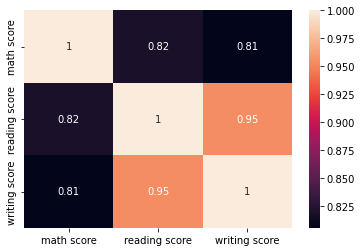

In [13]:
corr = data[['math score','reading score', 'writing score']].corr()
plt.figure()
sns.heatmap(corr, annot=True)

From the correlation matrix, we have the confirmation that the variable **reading score**, **writing score** and **math score** are highly correlated with one another, which means an increase in one leads to an increase to the other.

####  

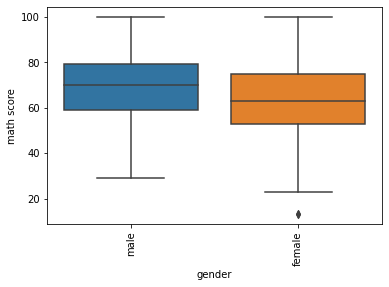

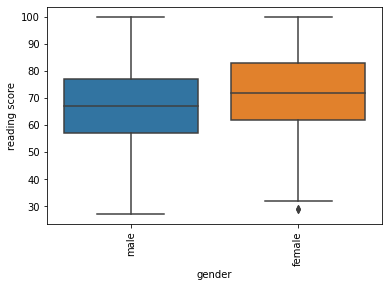

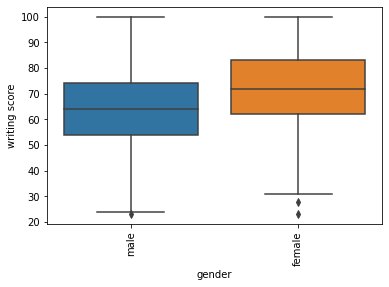

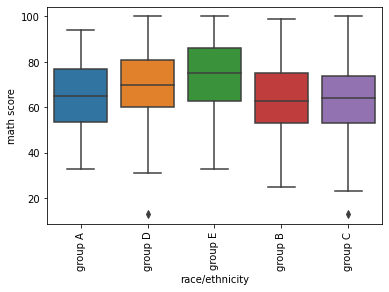

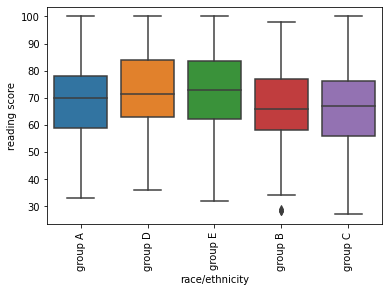

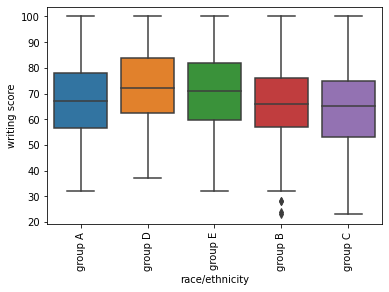

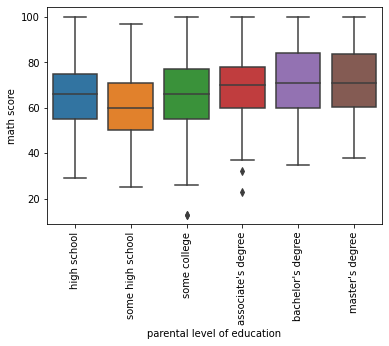

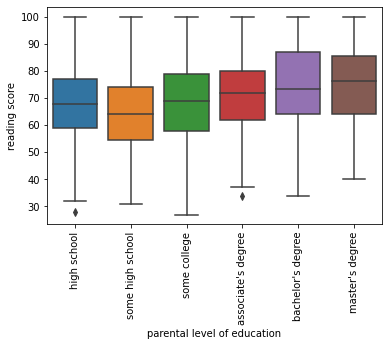

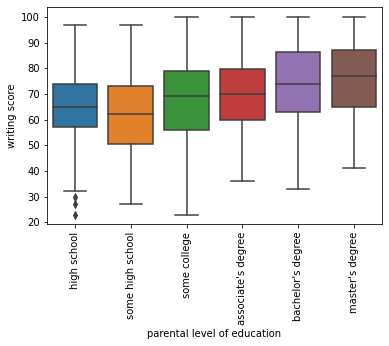

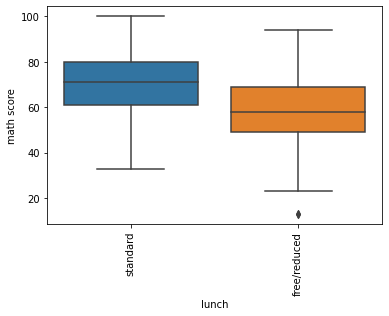

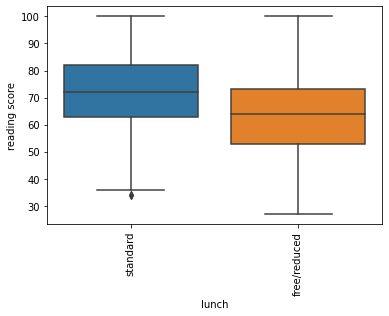

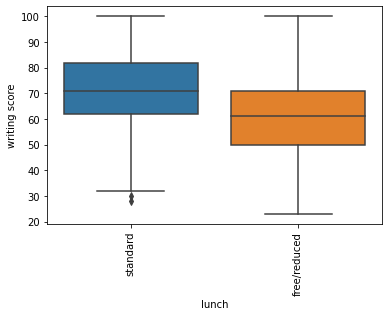

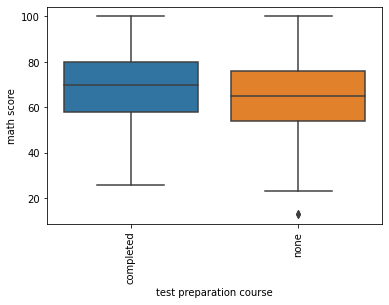

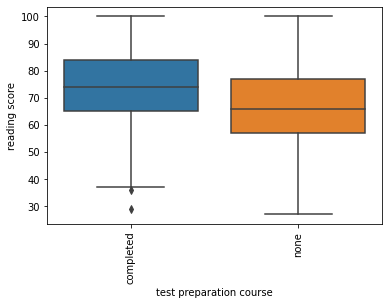

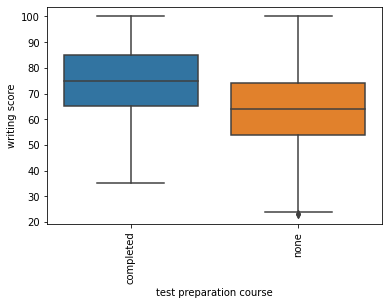

In [14]:
for i in data.select_dtypes(include=object):
    for j in data.select_dtypes(exclude=object):
        plt.figure()
        plt.tick_params(axis = 'x', rotation=90)
        sns.boxplot(x = i, y = j, data=data)

In [15]:
pd.crosstab(data.gender, data['test preparation course'])

test preparation course  completed  none
gender                                  
female                         160   323
male                           175   342